#House Price Prediction (Kaggle Dataset)

**Objective:**  
Predict house prices based on property features such as size, number of bedrooms, and location using regression models.

**Dataset Used:**  
House Sales in King County, USA — `kc_house_data.csv`

**Tools:**  
Python, Pandas, NumPy, scikit-learn, Matplotlib, Seaborn

**Evaluation Metrics:**  
- Mean Absolute Error (MAE)  
- Root Mean Squared Error (RMSE)  
- R² Score


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


In [2]:
#Loading the dataset
df = pd.read_csv("kc_house_data.csv")

# Preview
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#selecting the relevant columns
df_model = df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'zipcode']]

#encoding the zipcode (location) as categorical numeric
df_model['zipcode'] = df_model['zipcode'].astype('category').cat.codes

#showing the processed data
df_model.head()


C:\Users\sunrise\AppData\Local\Temp\ipykernel_13080\1939585213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['zipcode'] = df_model['zipcode'].astype('category').cat.codes


,price,sqft_living,bedrooms,bathrooms,zipcode
0,221900.0,1180,3,1.00,66
1,538000.0,2570,3,2.25,55
2,180000.0,770,2,1.00,16
3,604000.0,1960,4,3.00,58
4,510000.0,1680,3,2.00,37


In [5]:
X = df_model.drop('price', axis=1)
y = df_model['price']


In [6]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [9]:
#evaluation part
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MAE:  {mae_lr:,.2f}")
print(f"RMSE: {rmse_lr:,.2f}")
print(f"R²:   {r2_lr:.4f}")


Linear Regression Metrics:
MAE:  172,565.84
RMSE: 271,157.19
R²:   0.5136


In [10]:
#gradient boosting regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)


In [11]:
#gradient boosting evaluation
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Metrics:")
print(f"MAE:  {mae_gbr:,.2f}")
print(f"RMSE: {rmse_gbr:,.2f}")
print(f"R²:   {r2_gbr:.4f}")


Gradient Boosting Metrics:
MAE:  115,275.91
RMSE: 219,070.57
R²:   0.6825


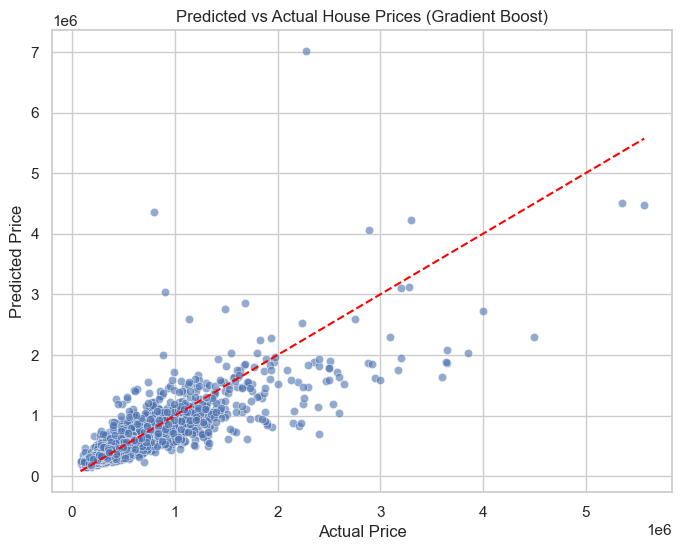

In [12]:
#visualize prediction vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices (Gradient Boost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


##insights

- Both Linear Regression and Gradient Boosting Regressor were trained.
- Gradient Boosting gave more accurate predictions with lower RMSE.
- Important features: `sqft_living`, `bedrooms`, `zipcode`, and `bathrooms`.

This model can be extended with more features (like condition, grade, waterfront) to improve accuracy further.
